# **Project Name**    - Integrated Retail Analytics for Store Optimization and Demand Forecasting



##### **Project Type**    - Advanced Machine Learning
##### **Contribution**    - Individual
##### **Team Member 1 -** Rajesh Kumar Patel

## **GitHub Link -** https://github.com/Rajesh1505/Capstone-Project-Advanced-Machine-Learning.git

# Project Title:
**Integrated Retail Analytics for Store Optimization and Demand Forecasting**

## Project Objective:
To utilize machine learning and data analysis techniques to optimize store performance, forecast demand, and enhance customer experience through segmentation and personalized marketing strategies.

## Project Components:

### **Anomaly Detection in Sales Data:**
- Identify unusual sales patterns across stores and departments.
- Investigate potential causes (e.g., holidays, markdowns, economic indicators).
- Implement anomaly handling strategies to clean the data for further analysis.

### **Time-Based Anomaly Detection:**
- Analyze sales trends over time.
- Detect seasonal variations and holiday effects on sales.
- Use time-series analysis for understanding store and department performance over time.

### **Data Preprocessing and Feature Engineering:**
- Handle missing values, especially in the MarkDown data.
- Create new features that could influence sales (e.g., store size/type, regional factors).

### **Customer Segmentation Analysis:**
- Segment stores or departments based on sales patterns, markdowns, and regional features.
- Analyze segment-specific trends and characteristics.

### **Market Basket Analysis:**
- Although individual customer transaction data is not available, infer potential product associations within departments using sales data.
- Develop cross-selling strategies based on these inferences.

### **Demand Forecasting:**
- Build models to forecast weekly sales for each store and department.
- Incorporate factors like CPI, unemployment rate, fuel prices, and store/department attributes.
- Explore short-term and long-term forecasting models.

### **Impact of External Factors:**
- Examine how external factors (economic indicators, regional climate) influence sales.
- Incorporate these insights into the demand forecasting models.

### **Personalization Strategies:**
- Develop personalized marketing strategies based on the markdowns and store segments.
- Propose inventory management strategies tailored to store and department needs.

### **Segmentation Quality Evaluation:**
- Evaluate the effectiveness of the customer segmentation.
- Use metrics to assess the quality of segments in terms of homogeneity and separation.

### **Real-World Application and Strategy Formulation:**
- Formulate a comprehensive strategy for inventory management, marketing, and store optimization based on the insights gathered.
- Discuss potential real-world challenges in implementing these strategies.

## Tools and Techniques:
- Machine Learning (e.g., clustering, time-series forecasting models, association rules).
- Data Preprocessing and Visualization.
- Statistical Analysis.

## Deliverables:
- A detailed report with analysis, insights, and strategic recommendations.
- Predictive models for sales forecasting and anomaly detection.
- Segmentation analysis and market basket insights.
- Code and data visualizations to support findings.


# About Dataset

## Context

#### The Challenge

One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales - the challenge is to predict which departments will be affected and to what extent.

#### Content

In this dataset have historical sales data for 45 stores located in different regions. Each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

Within the dataset, there are 3 Tabs - **Stores**, **Features**, and **Sales**.

#### **Stores**
This tab contains anonymized information about the 45 stores, indicating the type and size of each store.

#### **Features**
Contains additional data related to the store, department, and regional activity for the given dates. The features include:

- **Store**: The store number.
- **Date**: The week of the data.
- **Temperature**: Average temperature in the region.
- **Fuel_Price**: Cost of fuel in the region.
- **MarkDown1-5**: Anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011 and is not available for all stores all the time. Any missing value is marked as "NA".
- **CPI**: Consumer Price Index.
- **Unemployment**: The unemployment rate.
- **IsHoliday**: Whether the week is a special holiday week.

#### **Sales**
This tab contains historical sales data, which covers from 2010-02-05 to 2013-07-26. It includes the following fields:

- **Store**: The store number.
- **Dept**: The department number.
- **Date**: The week of the data.
- **Weekly_Sales**: Sales for the given department in the given store.
- **IsHoliday**: Whether the week is a special holiday week.



#Import Libraries and load the data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
!unzip "/content/drive/MyDrive/Colab Notebooks/AB/spec/M3/project/Retail Datsets.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/AB/spec/M3/project/Retail Datsets.zip
  inflating: Retail Datsets/Features data set.csv  
  inflating: Retail Datsets/stores data-set.csv  
  inflating: Retail Datsets/sales data-set.csv  


In [3]:
feature_data_df = pd.read_csv("/content/Retail Datsets/Features data set.csv")
sales_data_df = pd.read_csv("/content/Retail Datsets/sales data-set.csv")
store_data_df = pd.read_csv("/content/Retail Datsets/stores data-set.csv")

In [4]:
feature_data_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
feature_data_df.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [7]:
sales_data_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [8]:
feature_data_df.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [9]:
store_data_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
store_data_df.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [15]:
print(f' shape of feature_data: {feature_data_df.shape}\n shape of sales_data: {sales_data_df.shape}\n shape of store_data: {store_data_df.shape}')

 shape of feature_data: (8190, 12)
 shape of sales_data: (421570, 5)
 shape of store_data: (45, 3)


In [16]:
# Dataset Columns
print(f"Dataset all columns name: {list(feature_data_df.columns)} \n")
feature_data_df.info()

Dataset all columns name: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [17]:
# Dataset Columns
print(f"Dataset all columns name: {list(sales_data_df.columns)} \n")
sales_data_df.info()

Dataset all columns name: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [18]:
# Dataset Columns
print(f"Dataset all columns name: {list(store_data_df.columns)} \n")
store_data_df.info()

Dataset all columns name: ['Store', 'Type', 'Size'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [22]:
feature_data_df['Date'] = pd.to_datetime(feature_data_df['Date'], format="%d/%m/%Y")
sales_data_df['Date'] = pd.to_datetime(sales_data_df['Date'], format="%d/%m/%Y")

In [23]:
# checking start and end date in this dataset
print(f"start date in dataset ---> {feature_data_df['Date'].min()}")
print(f"last date in dataset ---> {feature_data_df['Date'].max()}")

start date in dataset ---> 2010-02-05 00:00:00
last date in dataset ---> 2013-07-26 00:00:00


In [25]:
# checking start and end date in this dataset
print(f"start date in dataset ---> {sales_data_df['Date'].min()}")
print(f"last date in dataset ---> {sales_data_df['Date'].max()}")

start date in dataset ---> 2010-02-05 00:00:00
last date in dataset ---> 2012-10-26 00:00:00


# Exploratory Data Analysis

In [26]:
feature_data_df['Date'] = pd.to_datetime(feature_data_df['Date'], format="%d/%m/%Y")
sales_data_df['Date'] = pd.to_datetime(sales_data_df['Date'], format="%d/%m/%Y")

In [27]:
# checking start and end date in this dataset
print(f"start date in dataset ---> {feature_data_df['Date'].min()}")
print(f"last date in dataset ---> {feature_data_df['Date'].max()}")

start date in dataset ---> 2010-02-05 00:00:00
last date in dataset ---> 2013-07-26 00:00:00


In [28]:
# checking start and end date in this dataset
print(f"start date in dataset ---> {sales_data_df['Date'].min()}")
print(f"last date in dataset ---> {sales_data_df['Date'].max()}")

start date in dataset ---> 2010-02-05 00:00:00
last date in dataset ---> 2012-10-26 00:00:00


In [29]:
# Merge all datasets
merged_df = pd.merge(sales_data_df, feature_data_df, how = 'left', on = ['Store','Date','IsHoliday'])
merged_df = pd.merge(merged_df, store_data_df, how = 'left', on = 'Store')
merged_df = merged_df.fillna(value =0)

In [31]:
merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [32]:
merged_df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221


In [34]:
# checking start and end date in merged dataset
print(f"start date in dataset ---> {merged_df['Date'].min()}")
print(f"last date in dataset ---> {merged_df['Date'].max()}")

start date in dataset ---> 2010-02-05 00:00:00
last date in dataset ---> 2012-10-26 00:00:00


In [37]:
# Dataset Columns
print(f"Dataset all columns name: {list(merged_df.columns)} \n")
merged_df.info()

Dataset all columns name: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkD

In [35]:
# Dataset Describe
merged_df.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328


In [36]:
merged_df.describe(include=['object'])

,Type
count,421570
unique,3
top,A
freq,215478


## Graphical insights across time

### Q1. What is the trend in weekly sales across time - year wise, month wise

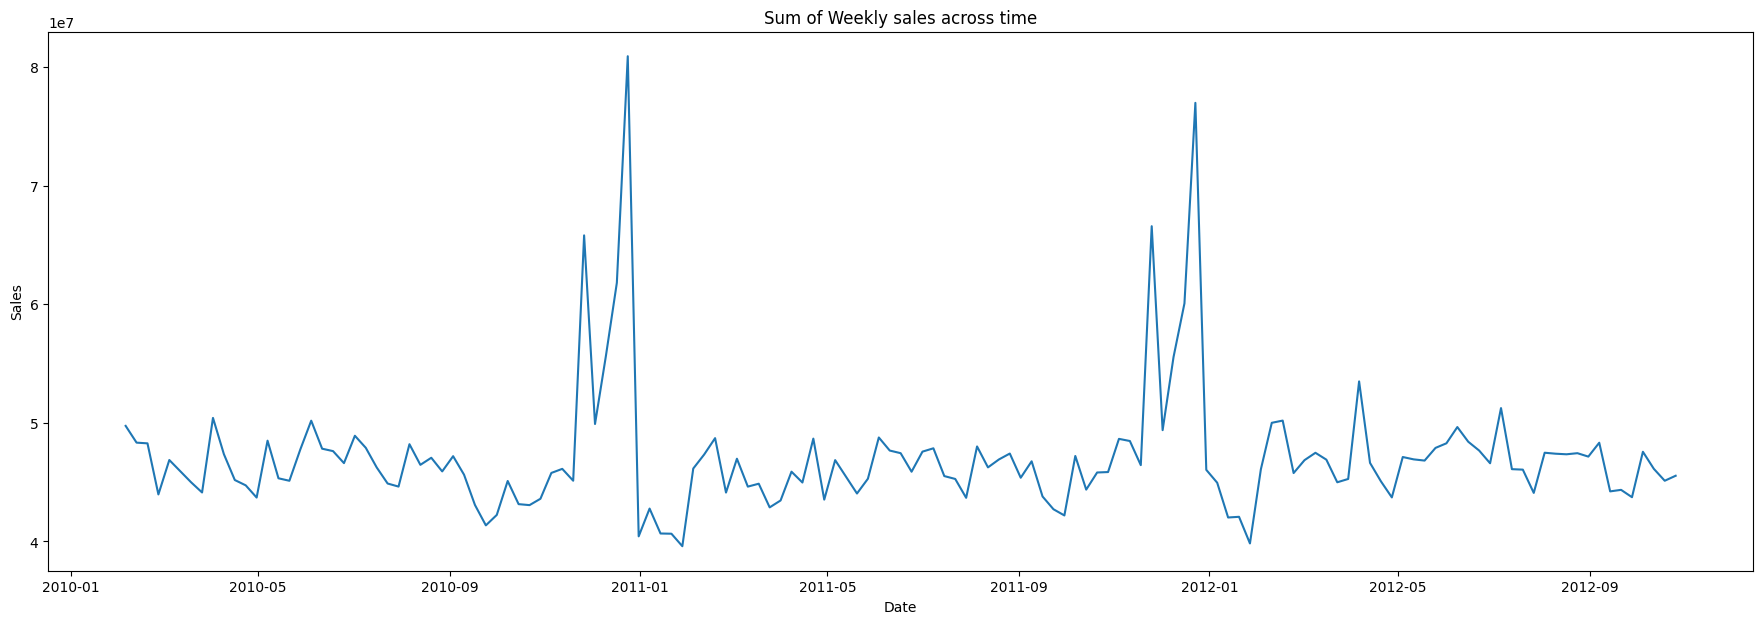

In [39]:
# Sum of sales  across time
sales_across_time = merged_df.groupby(by = ['Date'], as_index = False)['Weekly_Sales'].sum()

plt.figure(figsize = (22,7))
plt.plot(sales_across_time.Date, sales_across_time.Weekly_Sales)
plt.title("Sum of Weekly sales across time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

high sales on Nov and Dec month

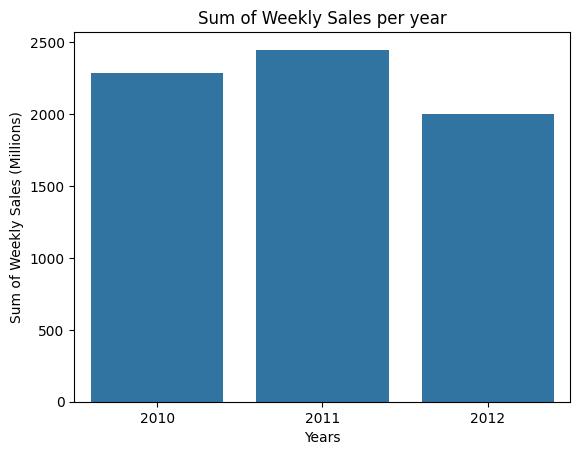

In [40]:
yearly_sales = merged_df.groupby(merged_df.Date.dt.year)['Weekly_Sales'].sum()/1000000
sns.barplot(x = yearly_sales.index, y = yearly_sales.values)
plt.title("Sum of Weekly Sales per year")
plt.ylabel("Sum of Weekly Sales (Millions)")
plt.xlabel("Years")
plt.show()

Sum of Weekly sales is the highest in 2011 compare to 2010 and 2012(but in 2012 Nov and Dec month data not available)

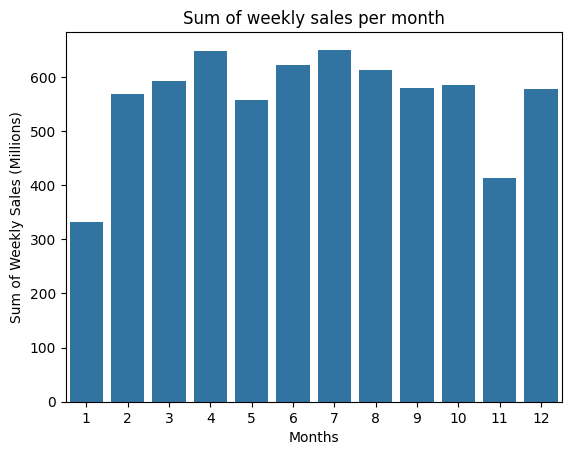

In [42]:
# Sum of weekly sales each month, across the years
monthly_sales = merged_df.groupby(merged_df.Date.dt.month)['Weekly_Sales'].sum()/1000000
sns.barplot(x = monthly_sales.index, y = monthly_sales.values)
plt.xlabel('Months')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title("Sum of weekly sales per month")
plt.show()

Sum of weekly sales is the highest in April and July then Jun

summary:

Sales tend to rise significantly during special offers and holidays (e.g., Black Friday, Christmas, New Year), followed by a decline. Subsequently, sales regain momentum in certain months.


November indicates reduced buying, possibly due to anticipation of upcoming sales.

## Sales Trend by Time:

Weekly sales surge in during November and December due to holiday promotions. Sales decline in January post-holiday season.

In [44]:
# Further deepdive into specific dates that drives highest weekly sales
# Top 20 dates where weekly_sales are the highest
sort_sales_across_time = sales_across_time.sort_values('Weekly_Sales', ascending = False)
sort_sales_across_time.head(20)

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
94,2011-11-25,66593605.26
42,2010-11-26,65821003.24
45,2010-12-17,61820799.85
97,2011-12-16,60085695.94
44,2010-12-10,55666770.39
96,2011-12-09,55561147.70
113,2012-04-06,53502315.87
126,2012-07-06,51253021.88


In [45]:
sort_sales_across_time = sales_across_time.sort_values('Weekly_Sales', ascending = True)
sort_sales_across_time.head(20)

,Date,Weekly_Sales
51,2011-01-28,39599852.99
103,2012-01-27,39834974.67
47,2010-12-31,40432519.00
50,2011-01-21,40654648.03
49,2011-01-14,40673678.04
33,2010-09-24,41358514.41
101,2012-01-13,42023078.48
102,2012-01-20,42080996.56
86,2011-09-30,42195830.81
34,2010-10-01,42239875.87


## Q2. What is the trend in average unemployment rate across time


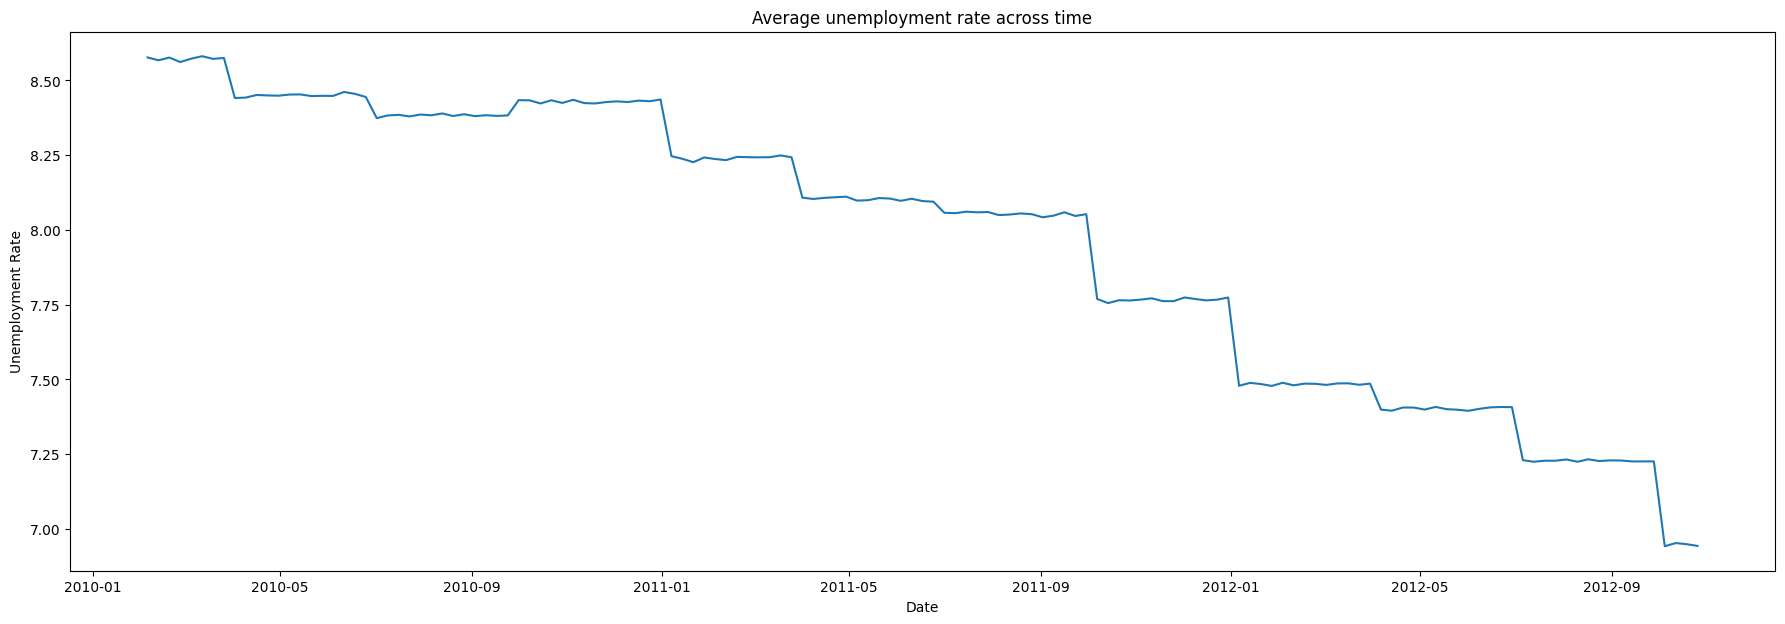

In [48]:
# Unemployment across time
unn_across_time = merged_df.groupby(by = ['Date'], as_index= False)['Unemployment'].mean()
plt.figure(figsize = (22,7))
plt.plot(unn_across_time.Date, unn_across_time.Unemployment)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.title("Average unemployment rate across time")
plt.show()

*Findings:-*

Over the period spanning from 2010 to 2012, we have noted a gradual decrease in the unemployment rate.This result in improving the purchasing power of the customer.

## Q3. What is the trend in average CPI across time
- Analyse the change in prices paid for a basket of conumer goods and services. Serves as an indicator of inflation rate

Consumer price index - measure of the average change overtime in the prices paid for a basket of consumer goods and services Higher CPI indicates a higher inflation

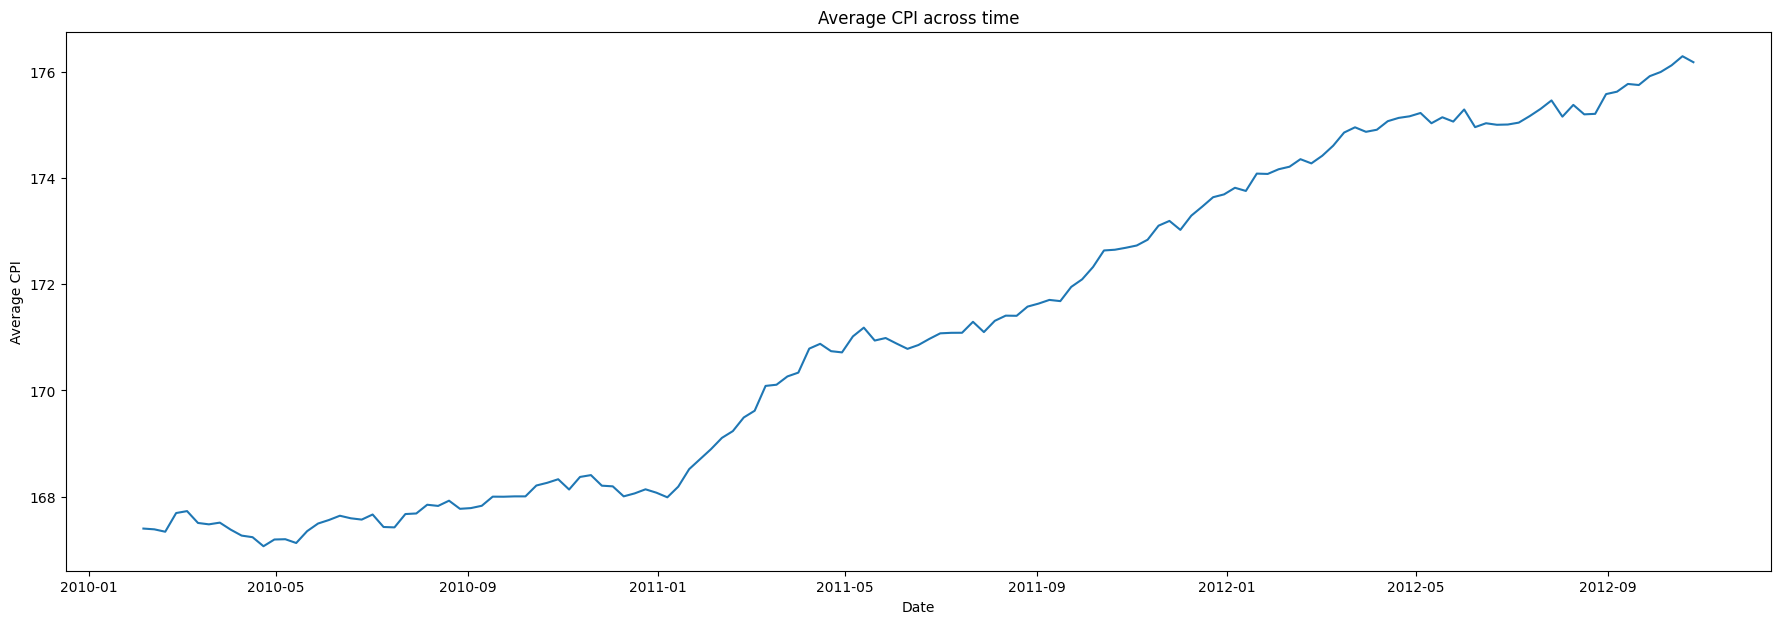

In [49]:
# CPI across time
cpi_across_time = merged_df.groupby(by = ['Date'], as_index= False)['CPI'].mean()
plt.figure(figsize = (22,7))
plt.plot(cpi_across_time.Date, cpi_across_time.CPI)
plt.xlabel('Date')
plt.ylabel("Average CPI")
plt.title("Average CPI across time")
plt.show()

*Findings:-*

Over the period spanning from 2010 to 2012, we have noted a gradual increase in the consumer price index due to inflation.

## Q4. What is the trend in average Fuel price, Temperature across time

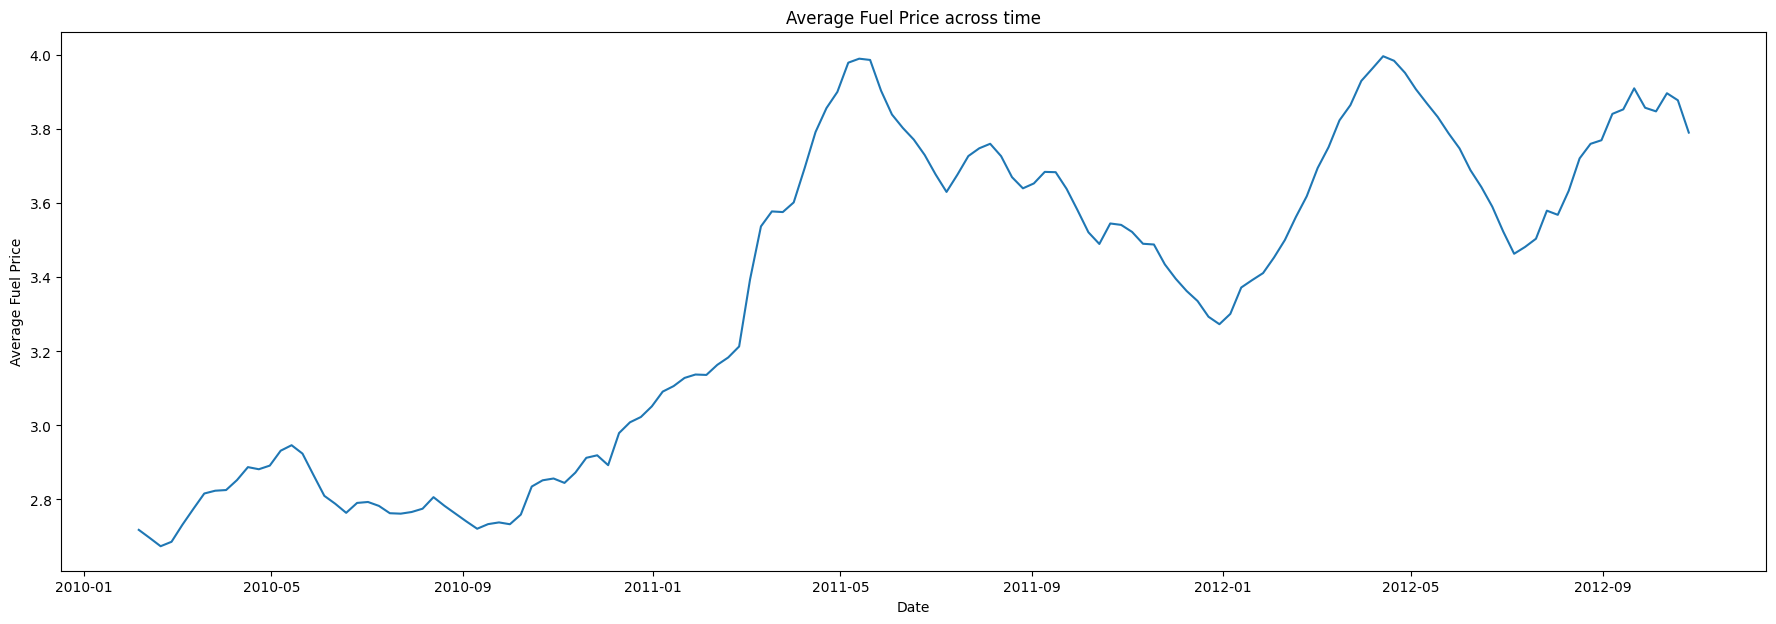

In [50]:
# Average fuel price across time
fuel_across_time = merged_df.groupby(by = ['Date'], as_index= False)['Fuel_Price'].mean()
plt.figure(figsize=(22,7))
plt.plot(fuel_across_time.Date, fuel_across_time.Fuel_Price)
plt.xlabel('Date')
plt.ylabel('Average Fuel Price')
plt.title("Average Fuel Price across time")
plt.show()

*Findings:-*

In 2010, we observed a relatively stable fuel price rate with no significant changes. However, from 2011 to 2012, there was a gradual increase in fuel price.

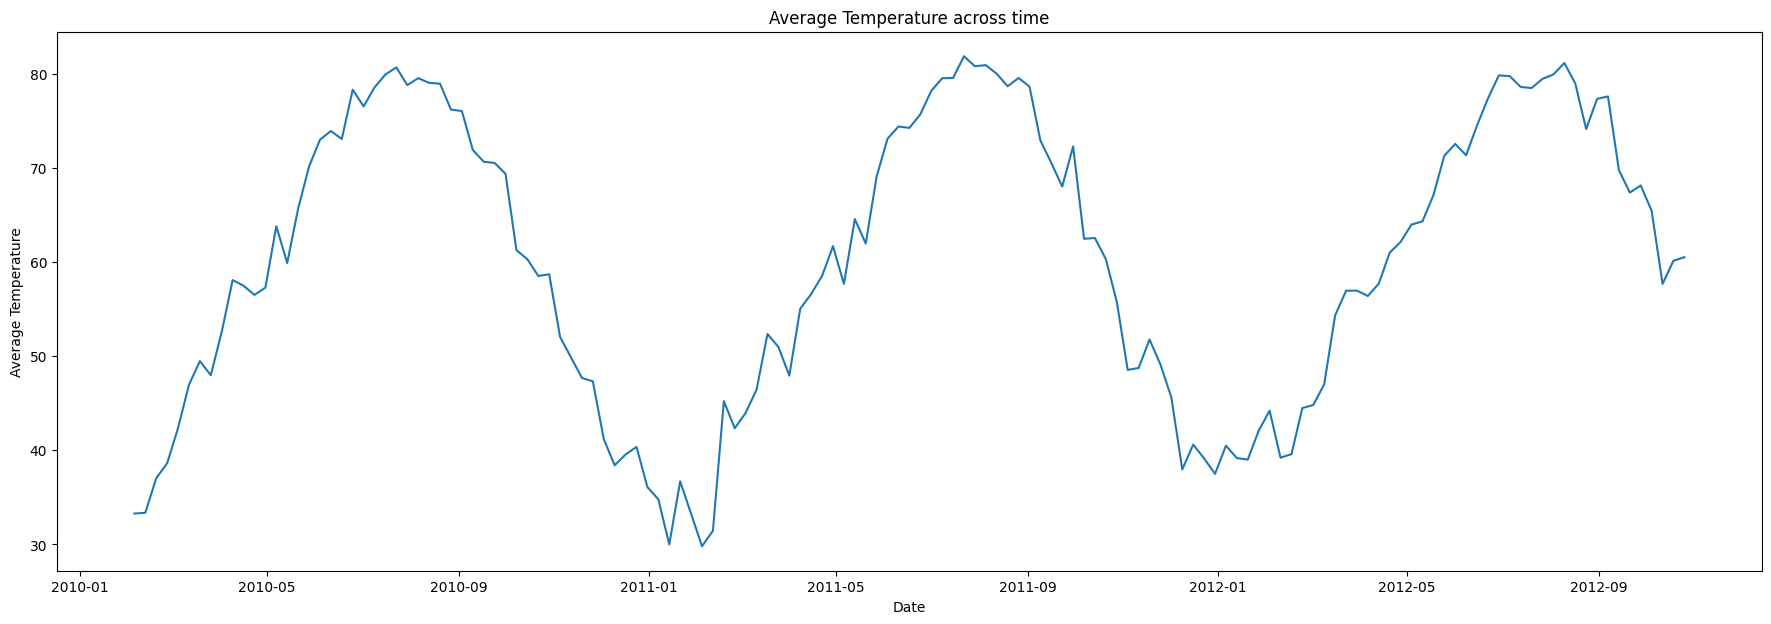

In [52]:
# Temperature  across time
temp_across_time = merged_df.groupby(by = ['Date'], as_index= False)['Temperature'].mean()
plt.figure(figsize=(22,7))
plt.plot(temp_across_time.Date, temp_across_time.Temperature)
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title("Average Temperature across time")
plt.show()

## Q5. Which stores are the highest earners?

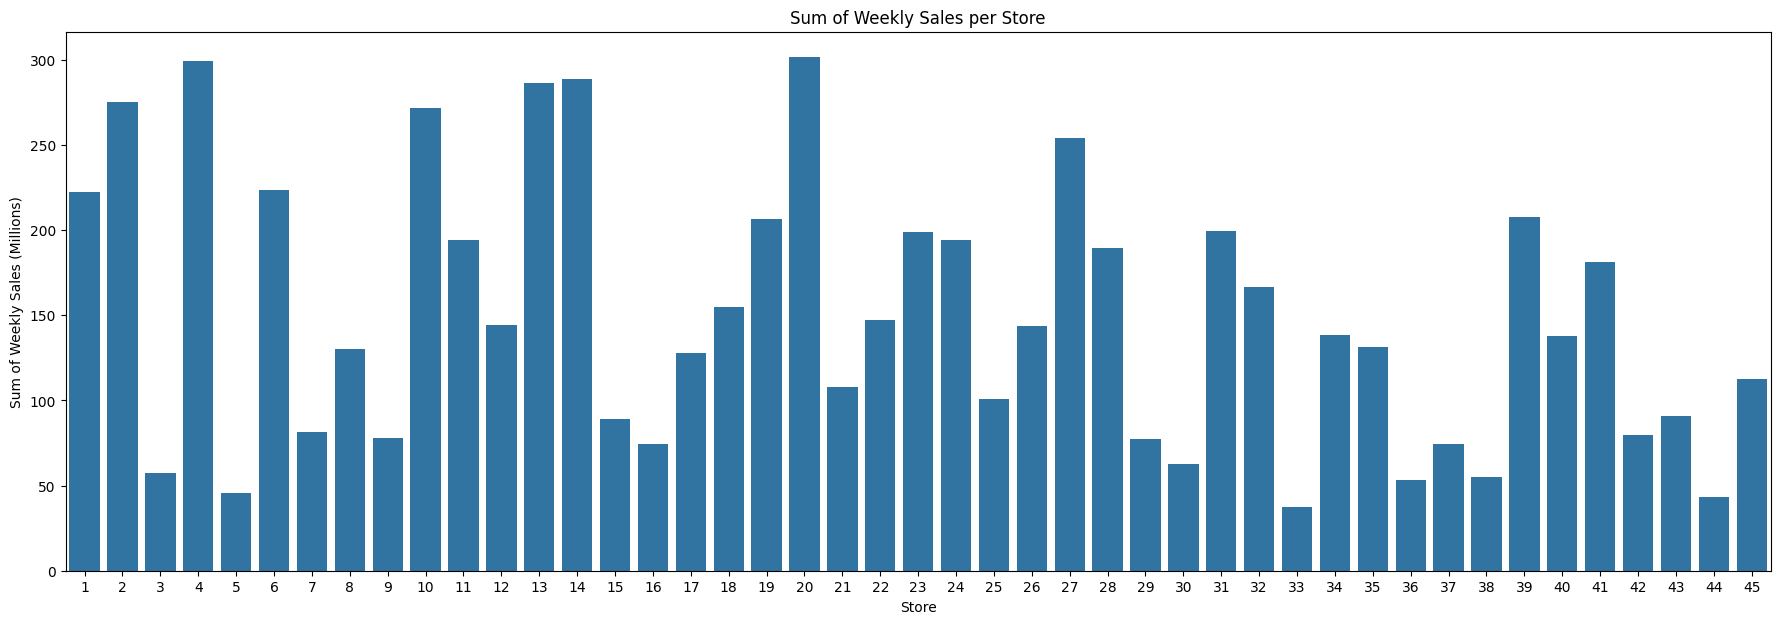

In [63]:
# Sum of weekly sales across Stores
stores_sales = merged_df.groupby(by = ['Store'], as_index= False)['Weekly_Sales'].sum()
stores_sales['Weekly_Sales'] = stores_sales['Weekly_Sales']/1000000
stores_sales['Weekly_Sales'] = stores_sales['Weekly_Sales'].sort_values(ascending = True)
plt.figure(figsize= (22,7))
sns.barplot(x = stores_sales.Store, y = stores_sales.Weekly_Sales , data = stores_sales)
plt.xlabel('Store')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Store')
plt.show()

Stores 20, 4, 13, 14 are the stores with the highest sales across time, while stores 33, 44, 5 least sales

## Q6. Which type of store is the highest earner?

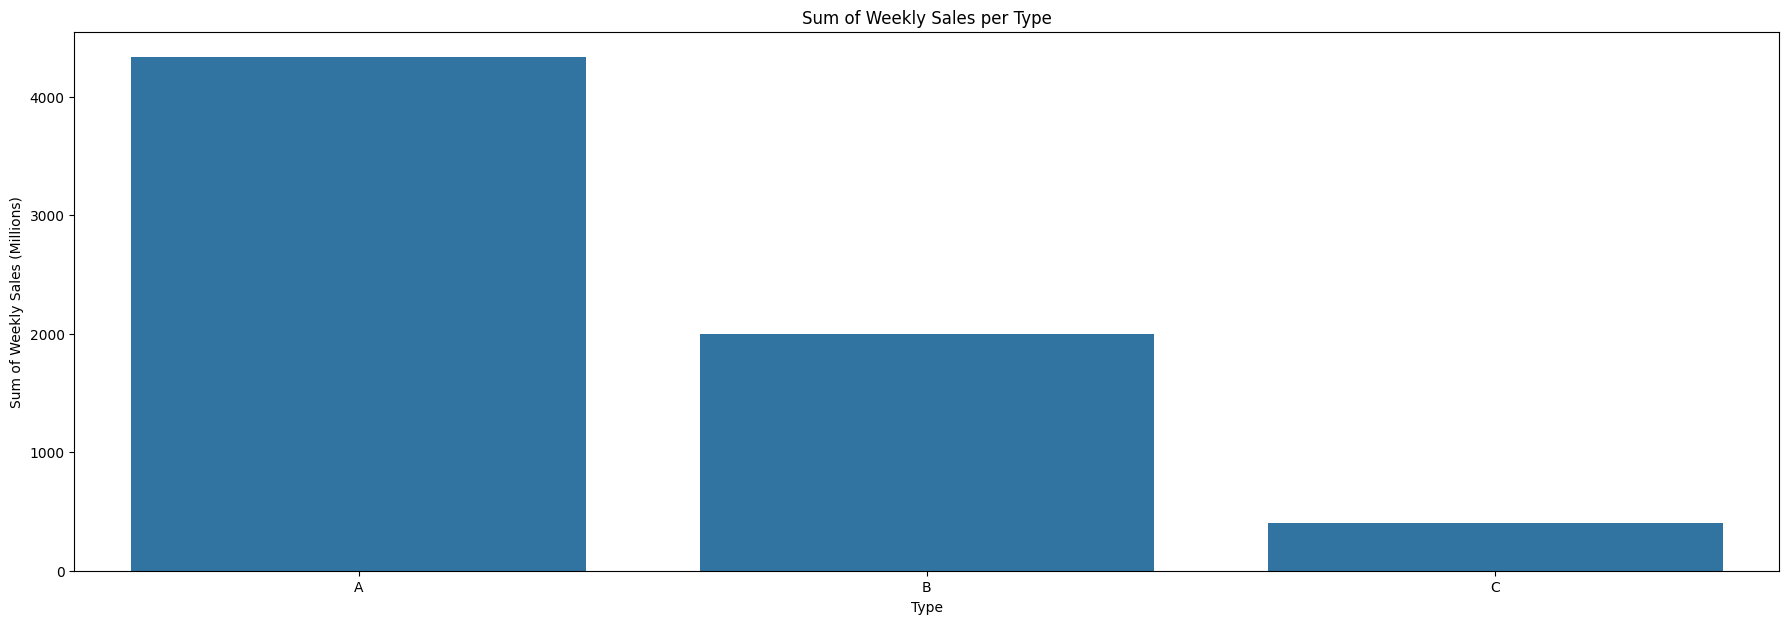

In [64]:
# Sum of weekly sales across Type
type_sales = merged_df.groupby(by = ['Type'], as_index= False)['Weekly_Sales'].sum()
type_sales['Weekly_Sales'] = type_sales['Weekly_Sales']/1000000
type_sales['Weekly_Sales'] = type_sales['Weekly_Sales'].sort_values(ascending = True)
plt.figure(figsize= (22,7))
sns.barplot(x = type_sales.Type, y = type_sales.Weekly_Sales , data = type_sales)
plt.xlabel('Type')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Type')
plt.show()

Type A has the highest sales

## Q7. Which departments are the highest earner?

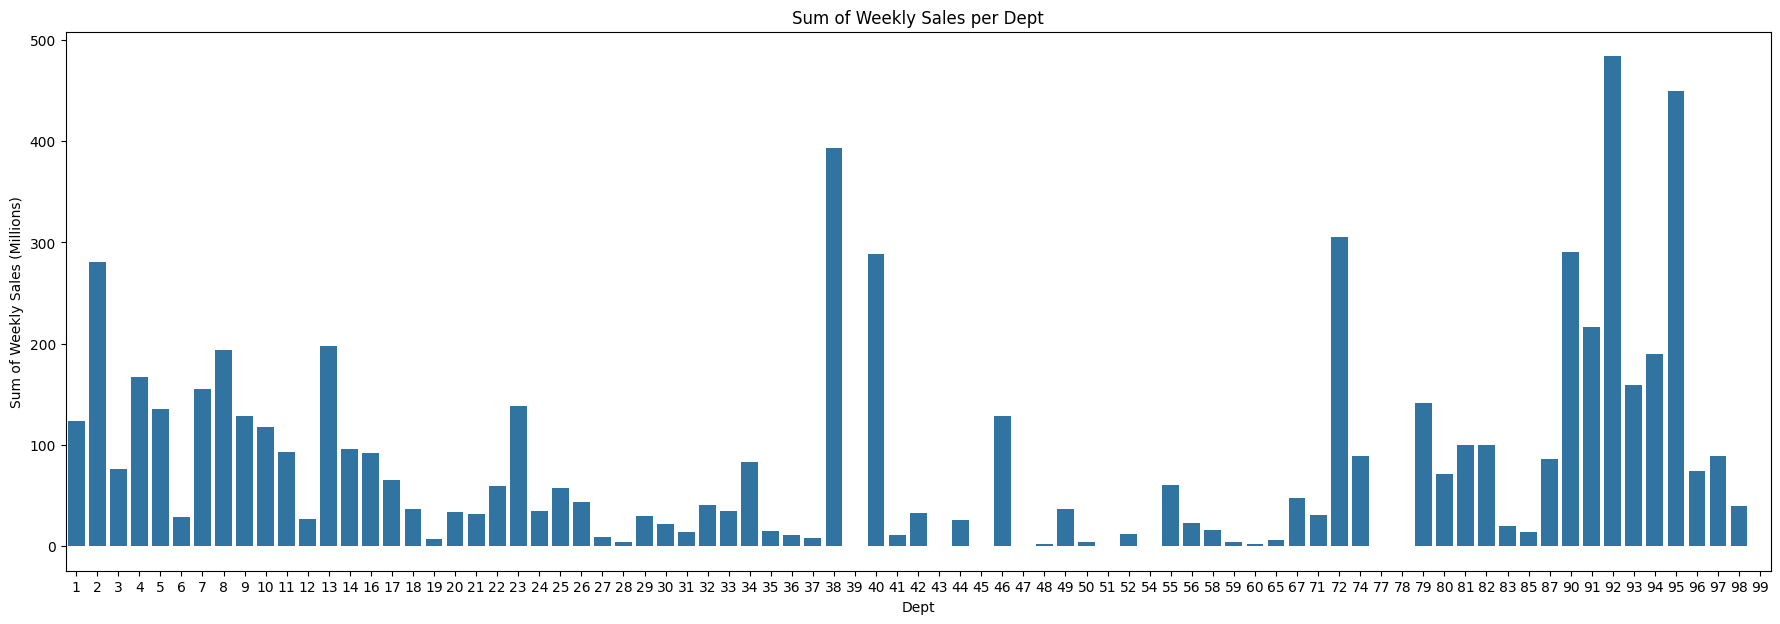

In [65]:
# Sum of weekly sales across Department
dept_sales = merged_df.groupby(by = ['Dept'], as_index= False)['Weekly_Sales'].sum()
dept_sales['Weekly_Sales'] = dept_sales['Weekly_Sales']/1000000
dept_sales['Weekly_Sales'] = dept_sales['Weekly_Sales'].sort_values(ascending = True)
plt.figure(figsize= (22,7))
sns.barplot(x = dept_sales.Dept, y = dept_sales.Weekly_Sales , data = dept_sales)
plt.xlabel('Dept')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Dept')
plt.show()

*Findings:*

Department 92, 95 demonstrate notably higher weekly sales.

## Q8: Trend of markdown across time

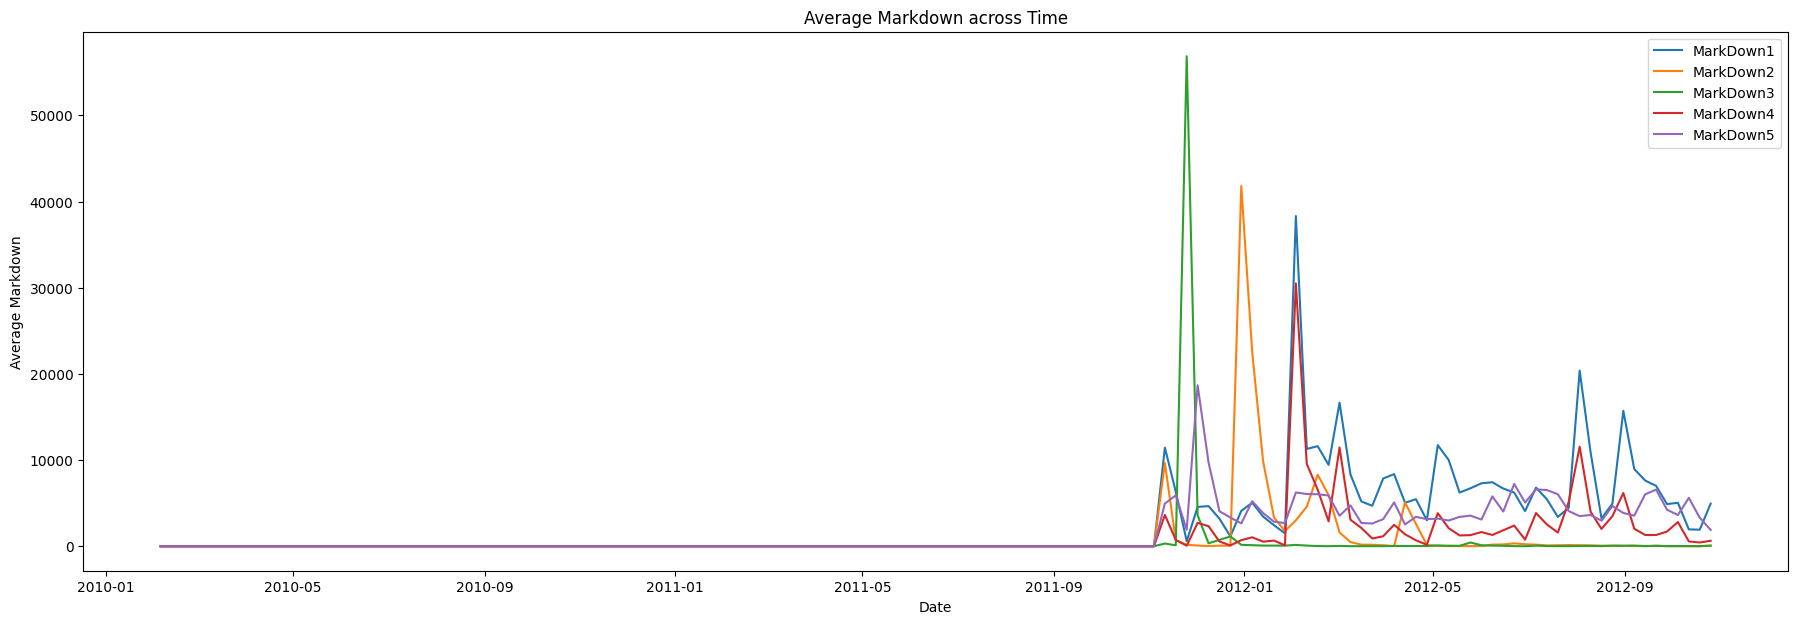

In [67]:
# Average Markdown across time
df_markdown = merged_df.groupby('Date').agg({'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
plt.figure(figsize = (22,7))

plt.plot(df_markdown.index, df_markdown.MarkDown1, label = 'MarkDown1')
plt.plot(df_markdown.index, df_markdown.MarkDown2, label = 'MarkDown2')
plt.plot(df_markdown.index, df_markdown.MarkDown3, label = 'MarkDown3')
plt.plot(df_markdown.index, df_markdown.MarkDown4, label = 'MarkDown4')
plt.plot(df_markdown.index, df_markdown.MarkDown5, label = 'MarkDown5')


plt.xlabel("Date")
plt.ylabel("Average Markdown")
plt.title("Average Markdown across Time")
plt.legend(loc = 'best')
plt.show()

Markdown3 is the highest

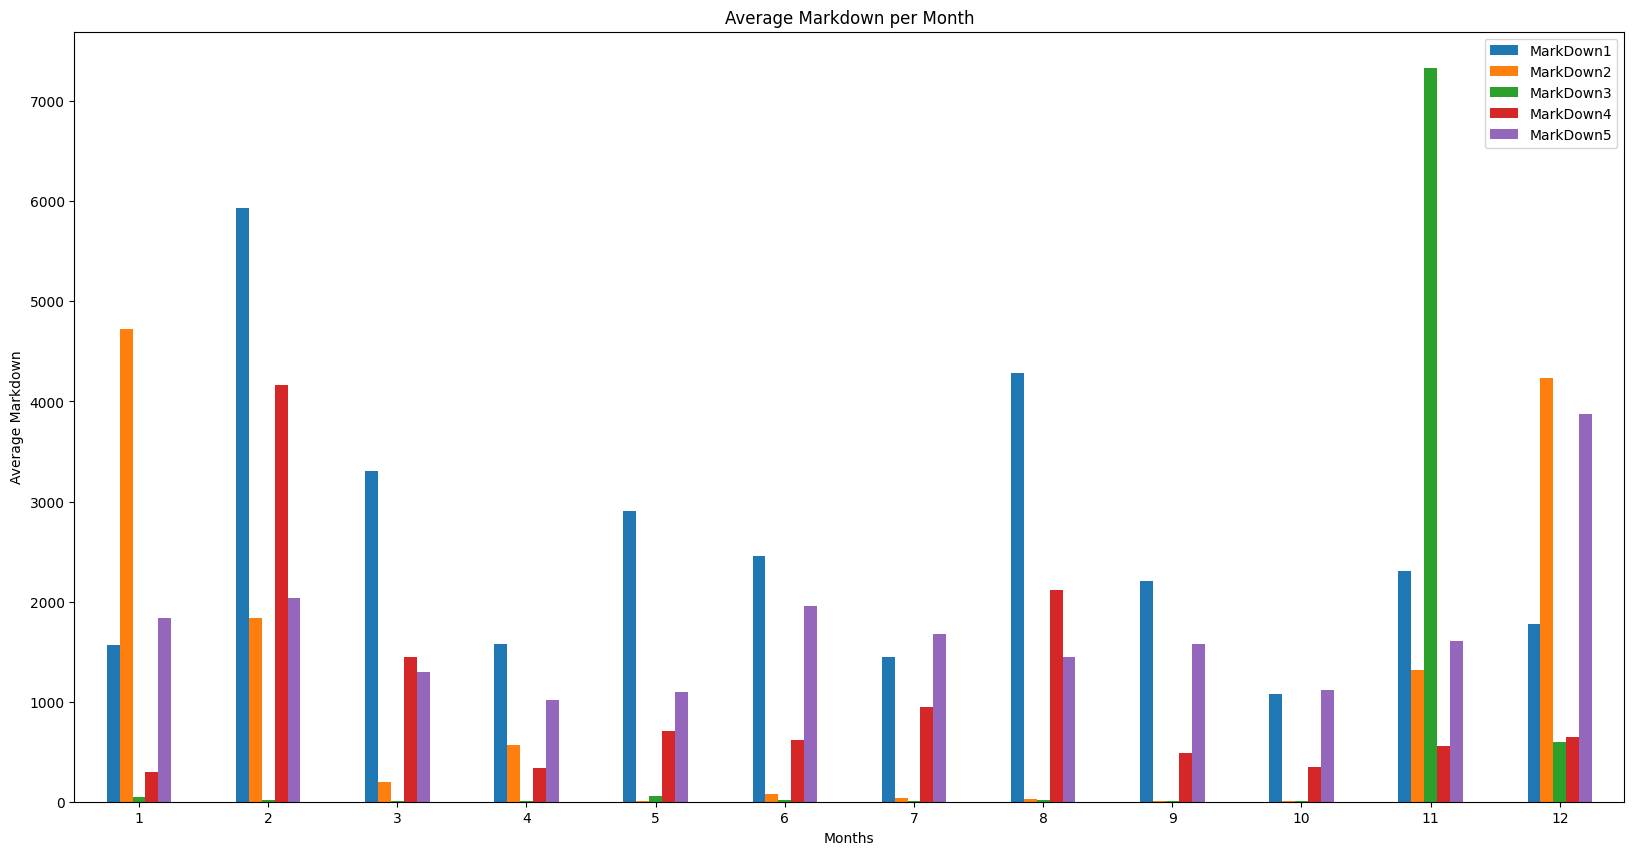

In [68]:
# Markdown across months
df_markdown_month = merged_df.groupby(merged_df.Date.dt.month).agg({'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
df_markdown_month.head()
df_markdown_month.plot(kind = 'bar', figsize = (20,10), rot = 0)
plt.xlabel("Months")
plt.ylabel('Average Markdown')
plt.title('Average Markdown per Month')
plt.show()

Markdown3 is the highest in Nov

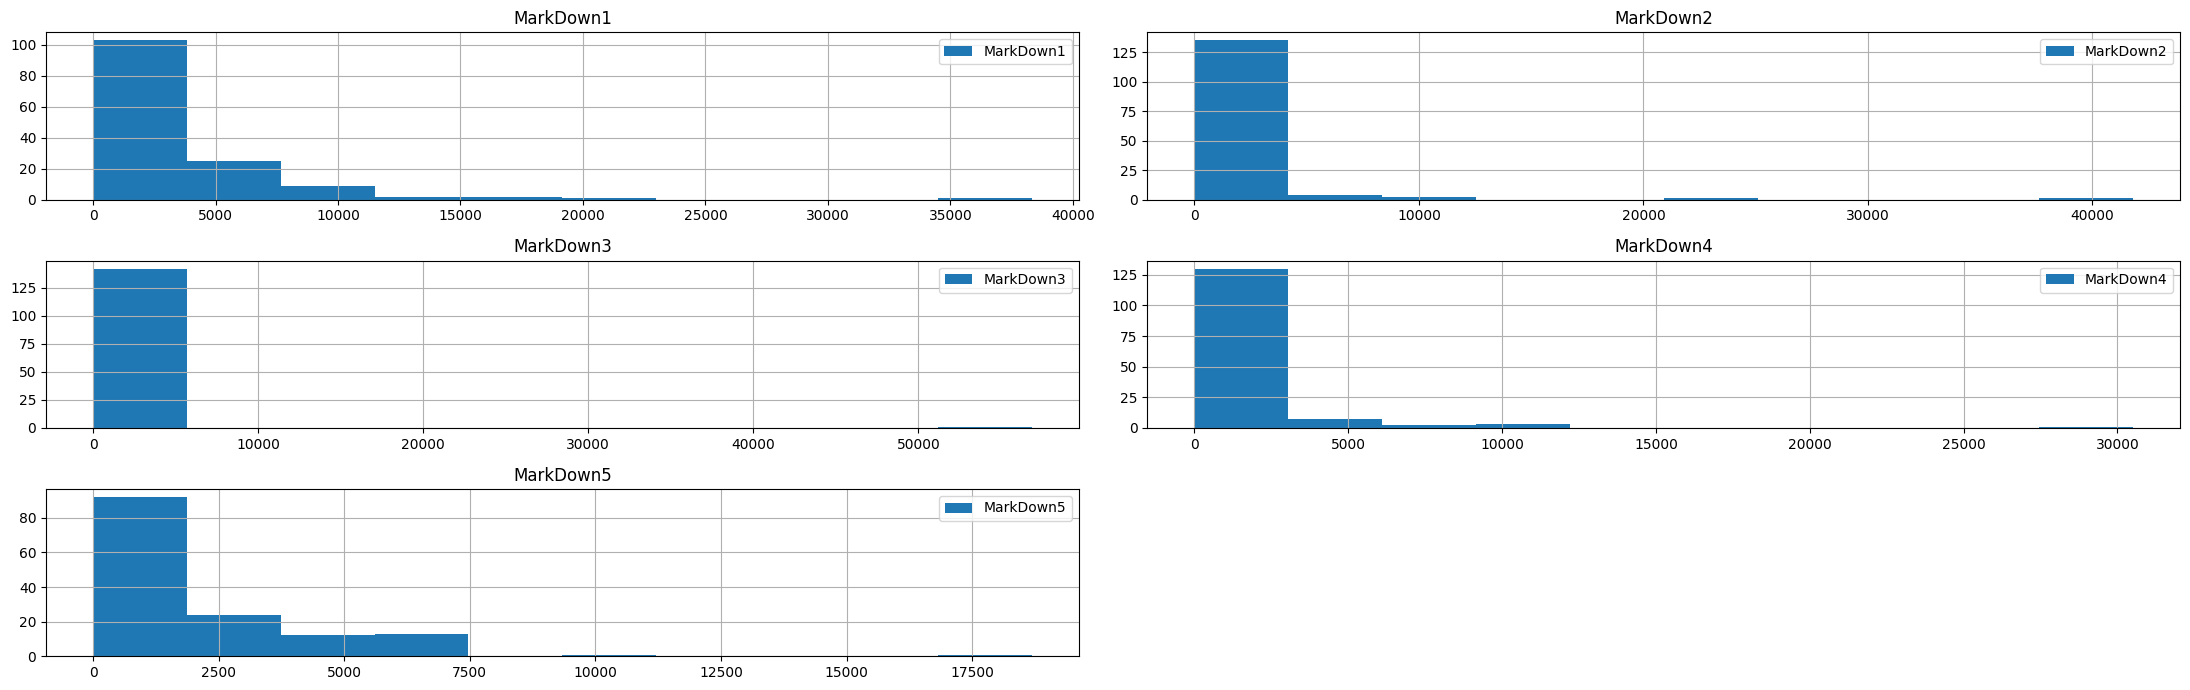

In [72]:
# Frequency of markdown
df_markdown.hist(bins=10,legend=True,figsize = (22,7))
plt.tight_layout()
plt.show()

## Q9: Trend of markdown across types

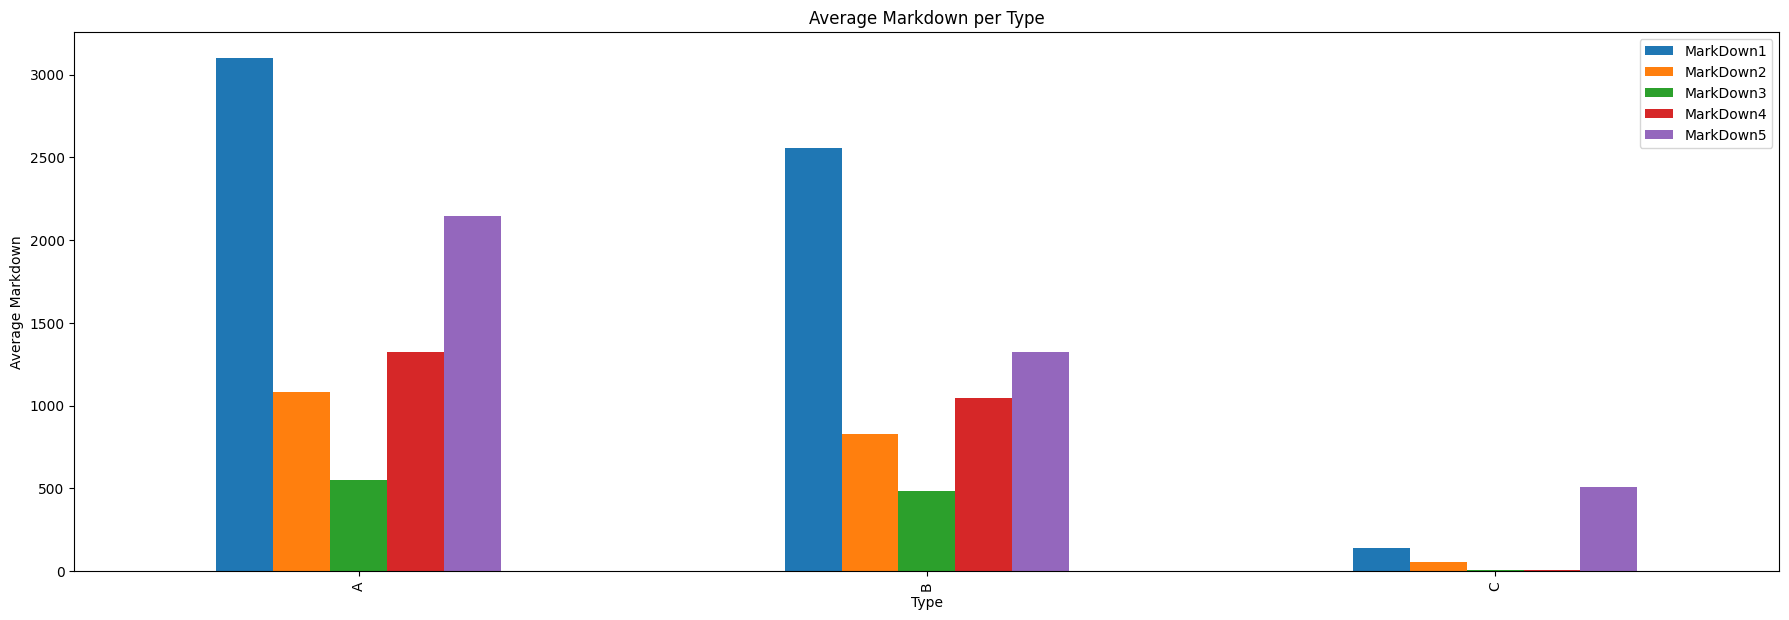

In [73]:
# Markdown across Type
# Markdown across months
df_markdown_type = merged_df.groupby(merged_df.Type).agg({'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
df_markdown_type.head()
df_markdown_type.plot(kind = 'bar', figsize = (22,7))
plt.xlabel("Type")
plt.ylabel('Average Markdown')
plt.title('Average Markdown per Type')
plt.show()

Markdown1 is the highest in for Type A and B and markdown5 is the second highest in A,B and highest for type C

## Q10: Correlation of factors and weekly sales

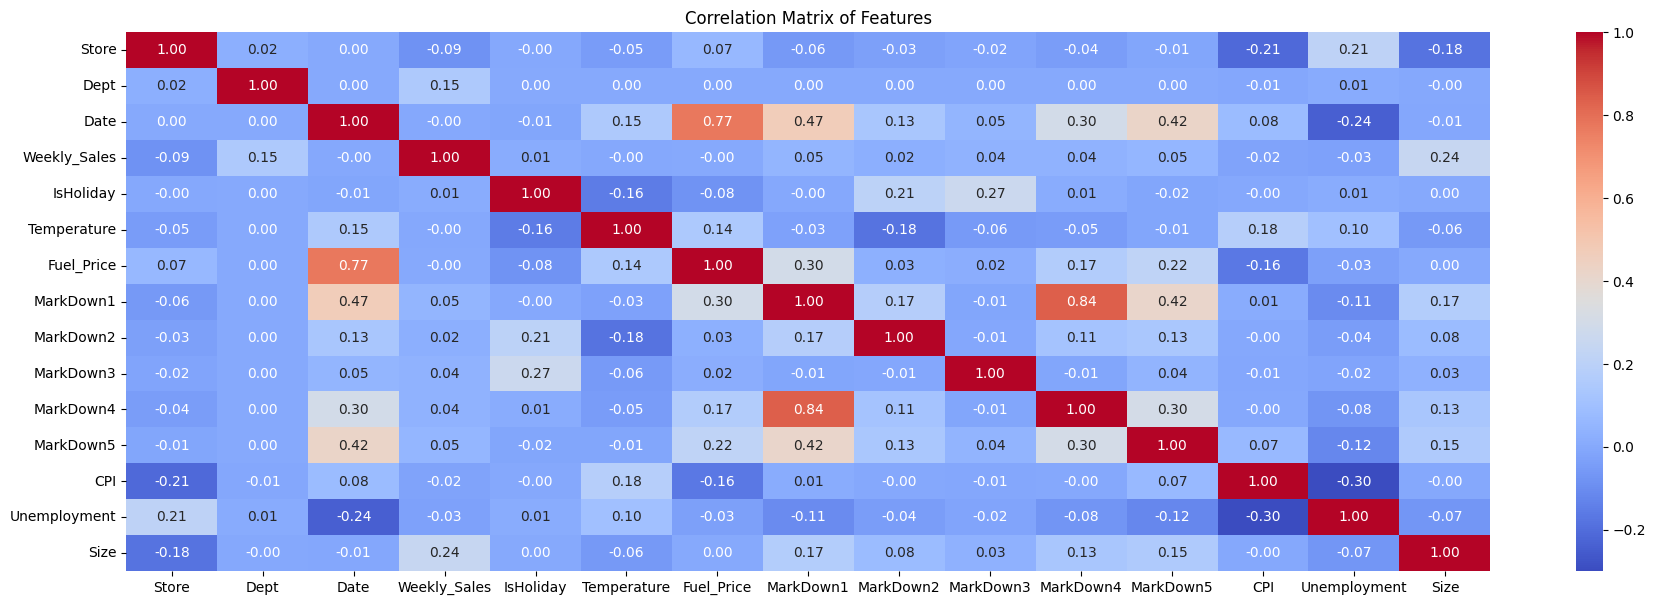

In [87]:
plt.figure(figsize=(22, 7))
sns.heatmap(merged_df[(merged_df.drop(columns=['Type']).columns)].corr().astype(float, errors = 'ignore'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

Weekly sales do not exhibit a strong correlation with other parameters.

CPI and Unemployment display a negative correlation.

## Analysis Datewise

let explore data based on the timeline

lets Merge Feature tables and sales tables based on the date

we will convert WeeklySales in Millions

we will modify column as the day is holiday or not

In [94]:
data_date = merged_df.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"})
data_date = data_date.sort_index()
temp_date_data = data_date[:'2012-12-10']

data_sales_date = sales_data_df.groupby("Date").agg({"Weekly_Sales":"sum"})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)
data = pd.merge(data_sales_date, temp_date_data, left_index=True,right_index=True, how='left')
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )

<Figure size 2200x700 with 0 Axes>

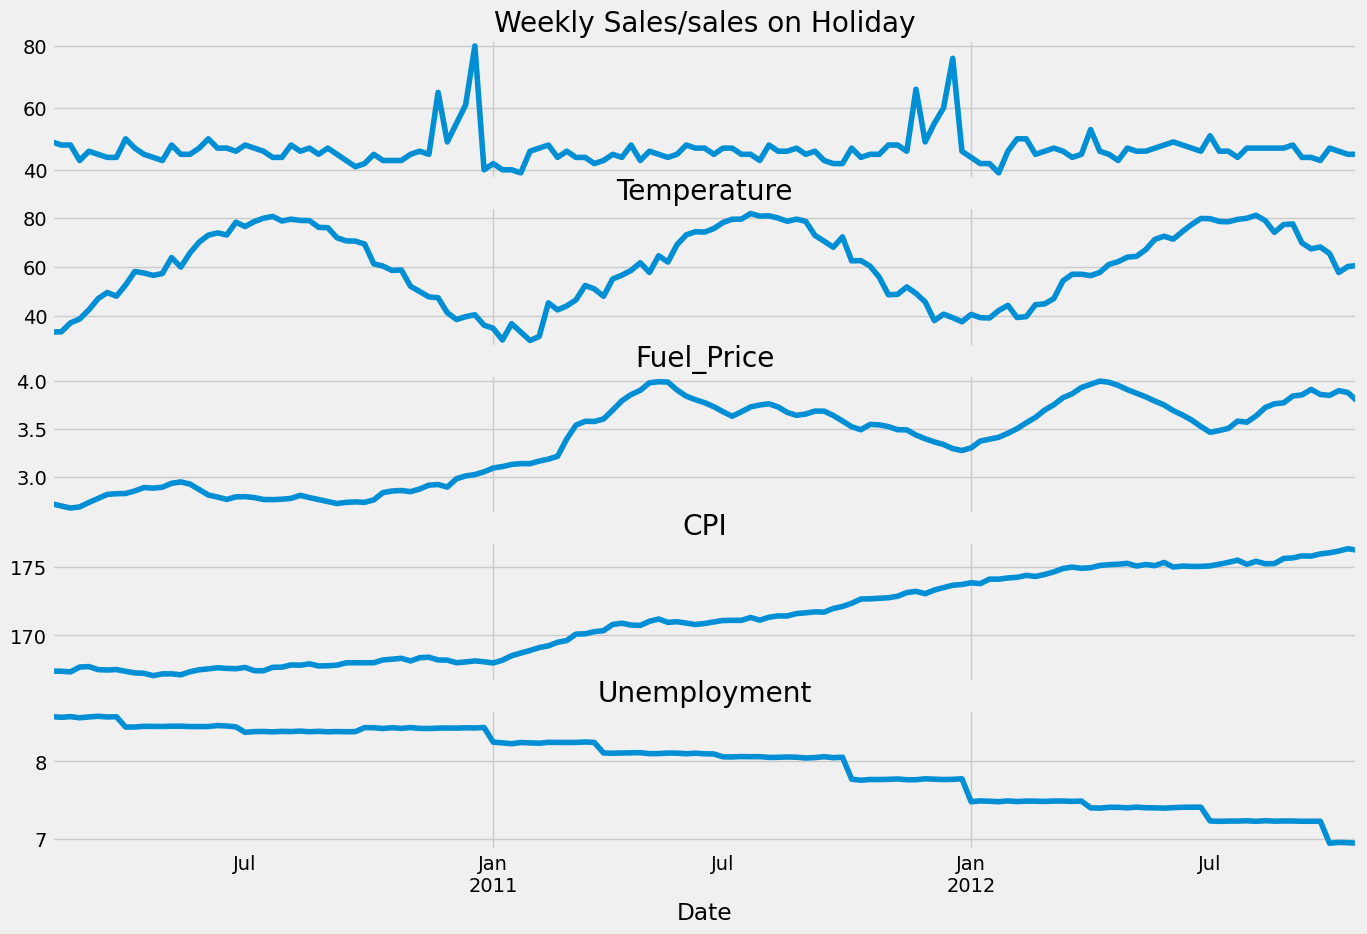

In [102]:
plt.figure(figsize=(22,7))
fig, ax = plt.subplots(5,1,figsize=(15,10),sharex=True)
data["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales/sales on Holiday")
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")
plt.show()

Nov, Dec shows spike in Weekly Sales in 2010 and 2011.

Fuel Price and Consumer Price Index shown growth over the year.

Unemployment decreased year after year.

Temperature is showing a seasonality

### In conclusion, understanding the dynamics of sales patterns, store types, and departmental performance is essential for effective business strategies. The data provides valuable insights for optimizing sales approaches, managing inventory, and tailoring marketing efforts to maximize revenue and enhance customer satisfaction.